# 184. 멀티 프로세스, 멀티 스레드

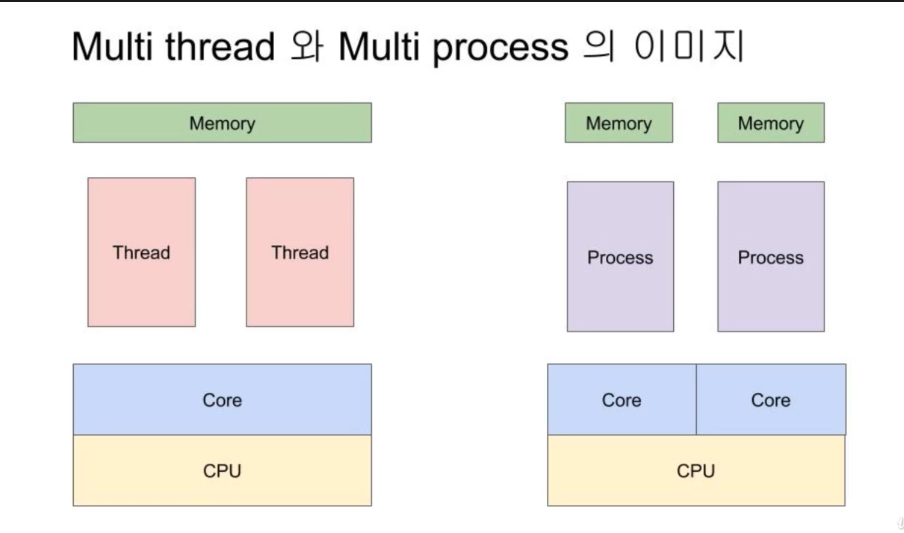

# 185 쓰레드

In [6]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1():
#     print(threading.current_thread().getName(), 'start')
    logging.debug('start')
#     time.sleep(5)
    logging.debug('end')
#     print(threading.current_thread().getName(), 'end')

def worker2():
    logging.debug('start')
#     print(threading.current_thread().getName(), 'start')
#     time.sleep(5)
    logging.debug('end')
#     print(threading.current_thread().getName(), 'end')
    
if __name__ == '__main__':
    t1 = threading.Thread(target=worker1)
    t2 = threading.Thread(target=worker2)
    t1.start()
    t2.start()
    print('started')

Thread-12: start


started


Thread-12: end
Thread-13: start
Thread-13: end


# 186 쓰레드에 전달하는 인수

In [11]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1():
    logging.debug('start')
    logging.debug('end')

def worker2(x, y=1):
    logging.debug('start')
    logging.debug(x)
    logging.debug(y)
    logging.debug('end')
    
if __name__ == '__main__':
    t1 = threading.Thread(name='rename worker1', target=worker1)
    t2 = threading.Thread(target=worker2, args=(100, ), kwargs={'y':200})
    t1.start()
    t2.start()
    print('started')

rename worker1: start


started


Thread-17: start
rename worker1: end
Thread-17: 100
Thread-17: 200
Thread-17: end


# 187. 데몬 스레드

In [17]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1():
    logging.debug('start')
    time.sleep(5) 
    logging.debug('end')

def worker2():
    logging.debug('start')
    time.sleep(2)
    logging.debug('end')
    
if __name__ == '__main__':
    t1 = threading.Thread(target=worker1)
    t1.setDaemon(True)
    t2 = threading.Thread(target=worker2)
    t1.start()
    t2.start()
    print('started')
    t1.join()
    t2.join()

Thread-26: start
Thread-27: start


started


Thread-27: end
Thread-26: end


# 188. 생존중의 스레드 객체의 모든 리스트

In [21]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1():
    logging.debug('start')
    time.sleep(5) 
    logging.debug('end')

def worker2():
    logging.debug('start')
    time.sleep(2)
    logging.debug('end')
    
if __name__ == '__main__':
#     threads = []
    for _ in range(5):
        t = threading.Thread(target=worker1)
        t.setDaemon(True)
        t.start()
#         threads.append(t)
    print(threading.enumerate())
    for thread in threading.enumerate():
        if thread is threading.currentThread():
            print(thread)
            continue
#     for thread in threads:
        thread.join()

#     t1 = threading.Thread(target=worker1)
#     t1.setDaemon(True)
#     t2 = threading.Thread(target=worker2)
#     t1.start()
#     t2.start()
#     print('started')
#     t1.join()
#     t2.join()

Thread-39: start
Thread-40: start
Thread-41: start
Thread-42: start
Thread-43: start


[<_MainThread(MainThread, started 8602177024)>, <Thread(Thread-2, started daemon 12936843264)>, <Heartbeat(Thread-3, started daemon 12953632768)>, <HistorySavingThread(IPythonHistorySavingThread, started 12971495424)>, <ParentPollerUnix(Thread-1, started daemon 12988837888)>, <Thread(Thread-39, started daemon 13005627392)>, <Thread(Thread-40, started daemon 13022416896)>, <Thread(Thread-41, started daemon 13039206400)>, <Thread(Thread-42, started daemon 13055995904)>, <Thread(Thread-43, started daemon 13072785408)>]
<_MainThread(MainThread, started 8602177024)>


Thread-39: end
Thread-40: end
Thread-41: end
Thread-42: end
Thread-43: end


KeyboardInterrupt: 

# 189. 타이머

In [26]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(x, y=1):
    logging.debug('start')
    logging.debug(x)
    logging.debug(y)
    time.sleep(5) 
    logging.debug('end')

def worker2():
    logging.debug('start')
    time.sleep(2)
    logging.debug('end')
    
if __name__ == '__main__':
    t = threading.Timer(3, worker1, args=(100,), kwargs={'y':200})
    t.start()
    t.join()

Thread-48: start
Thread-48: 100
Thread-48: 200
Thread-48: end


# 190 스레드 lock와 Rlock

In [34]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(d, lock):
    logging.debug('start')
    with lock: 
        i = d['x']
        time.sleep(5)
        d['x'] = i + 1
        logging.debug(d)
    logging.debug('end')

def worker2(d, lock):
    logging.debug('start')
    lock.acquire()
    i = d['x']
    d['x'] = i + 1
    logging.debug(d)
    lock.release()
    logging.debug('end')
    
if __name__ == '__main__':
    d = {'x' : 0 }
    lock = threading.Lock()
    t1 = threading.Thread(target=worker1, args=(d, lock))
    t2 = threading.Thread(target=worker2, args=(d, lock))    
    t1.start()
    t1.join()
    t2.start()
    t2.join()

Thread-63: start
Thread-63: {'x': 1}
Thread-63: end
Thread-64: start
Thread-64: {'x': 2}
Thread-64: end


In [36]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(d, lock):
    logging.debug('start')
    with lock: 
        i = d['x']
        time.sleep(5)
        d['x'] = i + 1
        logging.debug(d)
        with lock:
            d['x'] = i + 1
    logging.debug('end')

def worker2(d, lock):
    logging.debug('start')
    lock.acquire()
    i = d['x']
    d['x'] = i + 1
    logging.debug(d)
    lock.release()
    logging.debug('end')
    
if __name__ == '__main__':
    d = {'x' : 0 }
    lock = threading.RLock() # 두번 Lock 가능
    t1 = threading.Thread(target=worker1, args=(d, lock))
    t2 = threading.Thread(target=worker2, args=(d, lock))    
    t1.start()
    t1.join()
    t2.start()
    t2.join()

Thread-67: start
Thread-67: {'x': 1}
Thread-67: end
Thread-68: start
Thread-68: {'x': 2}
Thread-68: end


# 191 세마포어

In [42]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(semaphore):
    with semaphore: 
        logging.debug('start')
        time.sleep(5)
        logging.debug('end')

def worker2(semaphore):
    with semaphore: 
        logging.debug('start')
        time.sleep(5)
        logging.debug('end')

def worker3(semaphore):
    with semaphore: 
        logging.debug('start')
        time.sleep(5)
        logging.debug('end')

        
if __name__ == '__main__':
    d = {'x' : 0 }
    semaphore = threading.Semaphore(2) # Lock 스레드 갯수를 조정
    t1 = threading.Thread(target=worker1, args=(semaphore,))
    t2 = threading.Thread(target=worker2, args=(semaphore,))    
    t3 = threading.Thread(target=worker3, args=(semaphore,))   
    t1.start()
    t2.start()
    t3.start()
    t1.join()
    t2.join()
    t3.join()
    
    

Thread-81: start
Thread-82: start
Thread-81: end
Thread-83: start
Thread-82: end
Thread-83: end


# 192 큐

In [46]:
import logging
import queue
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(queue):
    logging.debug('start')
    queue.put(100)
    time.sleep(5)
    queue.put(200)
    logging.debug('end')

def worker2(queue):
    logging.debug('start')
    logging.debug(queue.get())
    logging.debug(queue.get())
    logging.debug('end')

        
if __name__ == '__main__':
    queue = queue.Queue() # Queue 자체가 Lock역활을 함
    t1 = threading.Thread(target=worker1, args=(queue,))
    t2 = threading.Thread(target=worker2, args=(queue,))    
    t1.start()
    t2.start()
    t1.join()
    t2.join()    

Thread-90: start
Thread-91: start
Thread-91: 100
Thread-90: end
Thread-91: 200
Thread-91: end


In [53]:
import logging
import queue
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(queue):
    logging.debug('start')
    while True:
        item = queue.get()
        if item is None:
            break
        logging.debug(item)
        queue.task_done()  ##### 없으면 종료 안함
    logging.debug('logggggggggggg')
    logging.debug('end')
        
if __name__ == '__main__':
    queue = queue.Queue() # Queue 자체가 Lock역활을 함
    for i in range(10):
        queue.put(i)
    t1 = threading.Thread(target=worker1, args=(queue,))
    t1.start()
    logging.debug('task are not done')
    queue.join()
    logging.debug('task are done')
    queue.put(None)
    t1.join()    

Thread-98: start
MainThread: task are not done
Thread-98: 0
Thread-98: 1
Thread-98: 2
Thread-98: 3
Thread-98: 4
Thread-98: 5
Thread-98: 6
Thread-98: 7
Thread-98: 8
Thread-98: 9
MainThread: task are done
Thread-98: logggggggggggg
Thread-98: end


In [56]:
import logging
import queue
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(queue):
    logging.debug('start')
    while True:
        item = queue.get()
        if item is None:
            break
        logging.debug(item)
        queue.task_done()  ##### 없으면 종료 안함
    logging.debug('logggggggggggg')
    logging.debug('end')
        
if __name__ == '__main__':
    queue = queue.Queue() # Queue 자체가 Lock역활을 함
    for i in range(100):
        queue.put(i)

    ts = []
    for _ in range(3):
        t = threading.Thread(target=worker1, args=(queue,))
        t.start()
        ts.append(t)

    logging.debug('task are not done')
    queue.join()
    logging.debug('task are done')
    for _ in range(len(ts)):
        queue.put(None)

    [t.join() for t in ts]   

Thread-102: start
Thread-103: start
Thread-104: start
MainThread: task are not done
Thread-102: 0
Thread-103: 1
Thread-104: 2
Thread-102: 3
Thread-103: 4
Thread-104: 5
Thread-102: 6
Thread-103: 7
Thread-104: 8
Thread-102: 9
Thread-103: 10
Thread-104: 11
Thread-102: 12
Thread-103: 13
Thread-104: 14
Thread-102: 15
Thread-103: 16
Thread-104: 17
Thread-102: 18
Thread-103: 19
Thread-104: 20
Thread-102: 21
Thread-103: 22
Thread-104: 23
Thread-102: 24
Thread-103: 25
Thread-104: 26
Thread-102: 27
Thread-103: 28
Thread-104: 29
Thread-102: 30
Thread-103: 31
Thread-104: 32
Thread-102: 33
Thread-103: 34
Thread-104: 35
Thread-102: 36
Thread-103: 37
Thread-104: 38
Thread-104: 41
Thread-103: 40
Thread-102: 39
Thread-104: 42
Thread-103: 43
Thread-102: 44
Thread-104: 45
Thread-103: 46
Thread-102: 47
Thread-104: 48
Thread-103: 49
Thread-102: 50
Thread-104: 51
Thread-103: 52
Thread-102: 53
Thread-102: 56
Thread-103: 55
Thread-104: 54
Thread-104: 59
Thread-103: 58
Thread-104: 60
Thread-102: 57
Thread-103:

# 193 이벤트

In [61]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(event):
    event.wait() ##
    logging.debug('start')
    time.sleep(3)
    logging.debug('end')

def worker2(event):
    event.wait() ##
    logging.debug('start')
    time.sleep(3)
    logging.debug('end')

def worker3(event):
    logging.debug('start')
    time.sleep(5)
    logging.debug('end')
    event.set() ##
    
if __name__ == '__main__':
    event = threading.Event() ##
    t1 = threading.Thread(target=worker1, args=(event,))
    t2 = threading.Thread(target=worker2, args=(event,))
    t3 = threading.Thread(target=worker3, args=(event,))
    t1.start()
    t2.start()
    t3.start()
    t1.join()
    t2.join()
    t3.join()

Thread-119: start
Thread-119: end
Thread-118: start
Thread-117: start
Thread-118: end
Thread-117: end


# 194 컨디션

In [65]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(condition):
    with condition:
        condition.wait()
        logging.debug('start')
        time.sleep(3)
        logging.debug('end')

def worker2(condition):
    with condition:
        condition.wait()
        logging.debug('start')
        time.sleep(3)
        logging.debug('end')

def worker3(condition):
    with condition:
        logging.debug('start')
        time.sleep(5)
        logging.debug('end')
        condition.notifyAll()
    
if __name__ == '__main__':
    condition = threading.Condition() ## 손서대로 실행
    t1 = threading.Thread(target=worker1, args=(condition,))
    t2 = threading.Thread(target=worker2, args=(condition,))
    t3 = threading.Thread(target=worker3, args=(condition,))
    t1.start()
    t2.start()
    t3.start()
    t1.join()
    t2.join()
    t3.join()

Thread-128: start
Thread-128: end
Thread-126: start
Thread-126: end
Thread-127: start
Thread-127: end


# 195 배리어

In [68]:
import logging
import threading
import time

logging.basicConfig(
    level=logging.DEBUG, format='%(threadName)s: %(message)s')

def worker1(barrier):
    r = barrier.wait()
    logging.debug('num={}'.format(r))
    while True:
        logging.debug('start')
        time.sleep(2)
        logging.debug('end')

def worker2(barrier):
    r = barrier.wait()
    logging.debug('num={}'.format(r))
    while True:
        logging.debug('start')
        time.sleep(2)
        logging.debug('end')
    
if __name__ == '__main__':
    barrier = threading.Barrier(2) ## 손서대로 실행
    t1 = threading.Thread(target=worker1, args=(barrier,))
    t2 = threading.Thread(target=worker2, args=(barrier,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()


Thread-134: num=1
Thread-133: num=0
Thread-134: start
Thread-133: start
Thread-130: end
Thread-129: end
Thread-130: start
Thread-129: start
Thread-134: end
Thread-133: end
Thread-134: start
Thread-133: start
Thread-130: end
Thread-130: start
Thread-129: end
Thread-129: start


KeyboardInterrupt: 

# 196 멀티프로세스

# 197. 워커프로세스의 풀(pool)로 비동기

# 198. 워커프로세스의 풀(pool)로 블록

# 199. 워커프로세스의 풀(pool)과 맵(map)

# 200. 프로세스간 통신에 대하여

# 201. 파이프 (pipe)

# 202. 프로세스간의 공유 메모리 (Value, Array)

# 203. 매니져 (Manager)

# 204 다른 머신에서 돌아가는 프로세스를 네트워크를 통해 공유하기

# 205 고수준의 인터페이스